### Run in collab
<a href="https://colab.research.google.com/github/racousin/data_science_practice/blob/master/website/public/modules/data-science-practice/module9/exercise/module9_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# module9_exercise2 : ML - Arena <a href="https://ml-arena.com/viewcompetition/5" target="_blank"> FrozenLake Competition</a> 

### Objective
Get at list an agent running on ML-Arena <a href="https://ml-arena.com/viewcompetition/5" target="_blank"> FrozenLake Competition</a> with mean reward upper than 0.35 (ie 35%)


You should submit an agent file named `agent.py` with a class `Agent` that includes at least the following attributes:

### Description

The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world [7,7].

Holes in the ice are distributed in set locations.

The player makes moves until they reach the goal or fall in a hole.

Each run will consist of 10 attempts to cross the ice. The reward will be the total amount accumulated during those trips. For example, if your agent reaches the goal 3 times out of 10, its reward will be 3.

The environment is based on :

In [2]:
env = gym.make('FrozenLake-v1', map_name="8x8")

In [3]:
def get_epislon_greedy_action_from_q(Q_s,epsilon):
    if np.random.rand() > epsilon:
        return np.argmax(Q_s)
    else:
        return np.random.choice(len(Q_s)) #

In [4]:

# decay Agent from exercice 1 
class DecayAgent():
    # Same other method as Agent
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.q = np.ones((env.observation_space.n, env.action_space.n))

    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        action=get_epislon_greedy_action_from_q(self.q[observation],self.epsilon)
        return action
    
    def qsa_update(self, state, action, reward, next_state, done) :
        target=reward+reward+ (0 if done else self.gamma*np.max(self.q[next_state]) )
        td_error = target-  self.q[state,action]
        self.q[state, action] += self.alpha*td_error

    
    def train(self, current_state, action, reward, next_state, done):
        self.qsa_update(current_state, action, reward, next_state, done)
        self.epsilon_decay_exponential()
    
    def epsilon_decay_exponential(self):
        self.epsilon = max(0.01, self.epsilon * 0.99)

In [5]:

def run_experiment(env, agent, nb_episode, is_train=True):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state= env.reset()[0]
        terminated, truncated = False, False
        rews = []
        while not (terminated or truncated):
            action = agent.choose_action(state)
            current_state = state
            state, reward, terminated, truncated, info = env.step(action)
            if is_train:
                agent.train(current_state, action, reward, state, terminated or truncated)
            rews.append(reward)
        rewards[i] = sum(rews)
        #print(f'Episode: {i} - Cumulative Reward: {rewards[i]}')
    return rewards

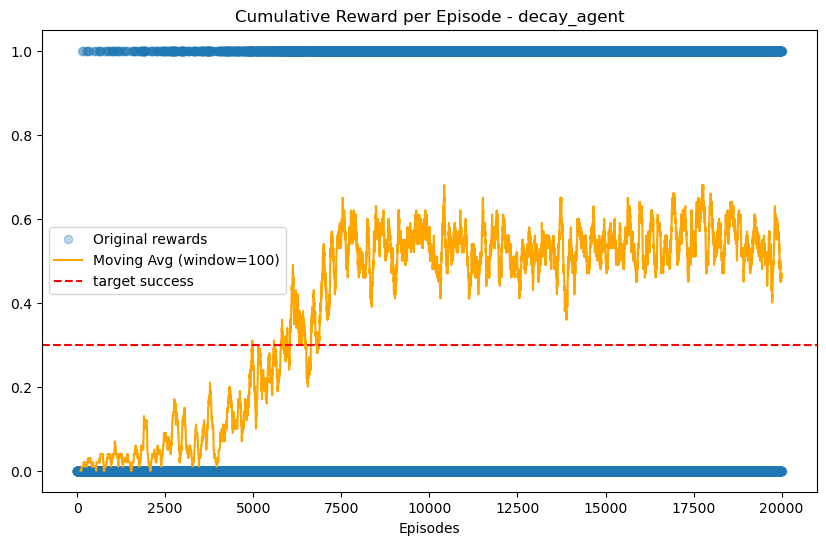

In [6]:
my_agent = DecayAgent(env)
rewards_decay_agent = run_experiment(env, my_agent, 20000)

# Compute the moving average with a window size of 100
window_size = 100
moving_avg_decay = np.convolve(rewards_decay_agent, np.ones(window_size) / window_size, mode='valid')

# Plot with subplots
plt.figure(figsize=(10, 6))

plt.plot(rewards_decay_agent, 'o', alpha=0.3, label='Original rewards')
plt.plot(range(window_size - 1, len(rewards_decay_agent)), moving_avg_decay, label=f'Moving Avg (window={window_size})', color='orange')
#plt.plot(epsilons,alpha=1,color='black',label='epsilon')
plt.axhline(y=0.3, color='red', linestyle='--', label='target success')
plt.title('Cumulative Reward per Episode - decay_agent')
plt.xlabel('Episodes')
plt.legend(loc='best')

plt.show()


In [7]:
q_table=my_agent.q
q_table

array([[0.60037355, 0.60822426, 0.60527614, 0.61690611],
       [0.60750339, 0.61401007, 0.63406132, 0.61729878],
       [0.62812564, 0.63622824, 0.66712231, 0.63667478],
       [0.65866267, 0.65737887, 0.69750331, 0.65476652],
       [0.68368611, 0.68028441, 0.72308651, 0.69109806],
       [0.71827357, 0.72831924, 0.76484045, 0.72567521],
       [0.74403384, 0.73379589, 0.79392821, 0.74203109],
       [0.7929354 , 0.79385673, 0.7992533 , 0.79428036],
       [0.56957175, 0.57056195, 0.57456832, 0.61254527],
       [0.5883795 , 0.59019152, 0.59576188, 0.62599348],
       [0.60550275, 0.60541849, 0.6110304 , 0.65454594],
       [0.58740878, 0.5565256 , 0.54412421, 0.68449347],
       [0.66956792, 0.66843992, 0.69844114, 0.66711166],
       [0.72205705, 0.73324007, 0.75637405, 0.73550332],
       [0.77958972, 0.80868149, 0.78076341, 0.769138  ],
       [0.80662208, 0.8317403 , 0.82152375, 0.79233094],
       [0.5804852 , 0.55747796, 0.55718567, 0.55726318],
       [0.55588449, 0.55575431,

### Before submit
Test that your agent has the right attributes

In [8]:

# decay Agent from exercice 1 
class Agent1():
    # Same other method as Agent
    def __init__(self, env, epsilon = .1):
        self.env = env
        self.epsilon = epsilon
        self.q = q_table

    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        action=get_epislon_greedy_action_from_q(self.q[observation],self.epsilon)
        return action

In [9]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.policy= q_table


    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        action = np.argmax(self.policy[observation])
        return action

In [10]:
env = gym.make('FrozenLake-v1', map_name="8x8")
agent = Agent1(env)
nb_run = 10
rewards = []

for i in range(nb_run):
    observation, _ = env.reset()
    reward, terminated, truncated, info = None, False, False, None
    while not (terminated or truncated):
        action = agent.choose_action(observation, reward=reward, terminated=terminated, truncated=truncated, info=info)
        observation, reward, terminated, truncated, info = env.step(action)
    rewards.append(reward)
print(f'Mean Reward: {np.mean(rewards)}')

Mean Reward: 0.5


In [11]:
env = gym.make('FrozenLake-v1', map_name="8x8")
agent = Agent(env)
nb_run = 10
rewards = []

for i in range(nb_run):
    observation, _ = env.reset()
    reward, terminated, truncated, info = None, False, False, None
    while not (terminated or truncated):
        action = agent.choose_action(observation, reward=reward, terminated=terminated, truncated=truncated, info=info)
        observation, reward, terminated, truncated, info = env.step(action)
    rewards.append(reward)
print(f'Mean Reward: {np.mean(rewards)}')

Mean Reward: 0.4
